# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
#1 What is the distribution of our target variable?
target_variable = 'fraud'
target_counts = fraud[target_variable].value_counts()

print("Distribution of target variable:")
print(target_counts)

Distribution of target variable:
fraud
0.0    912597
1.0     87403
Name: count, dtype: int64


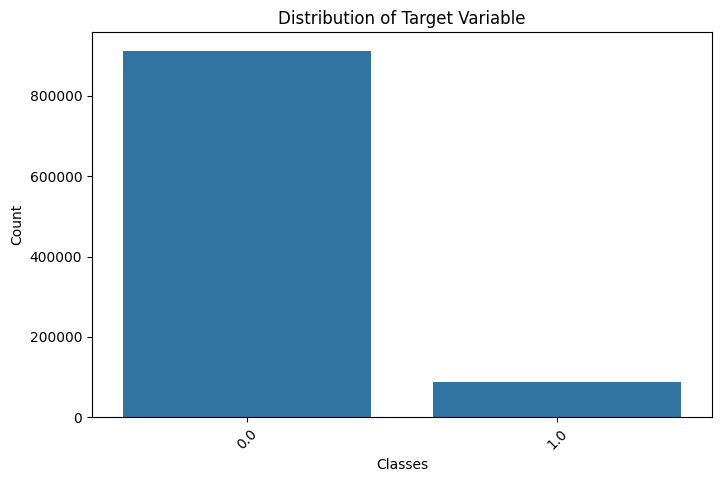

In [6]:
#1 Can we say we're dealing with an imbalanced dataset?

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Distribution of Target Variable')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [12]:
#2 Train a LogisticRegression.

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

features = fraud.drop(columns=[target_variable])
target = fraud[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_scaled)

Confusion Matrix:
[[181346   1269]
 [  6887  10498]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182615
         1.0       0.89      0.60      0.72     17385

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000

[[181346   1269]
 [  6887  10498]]


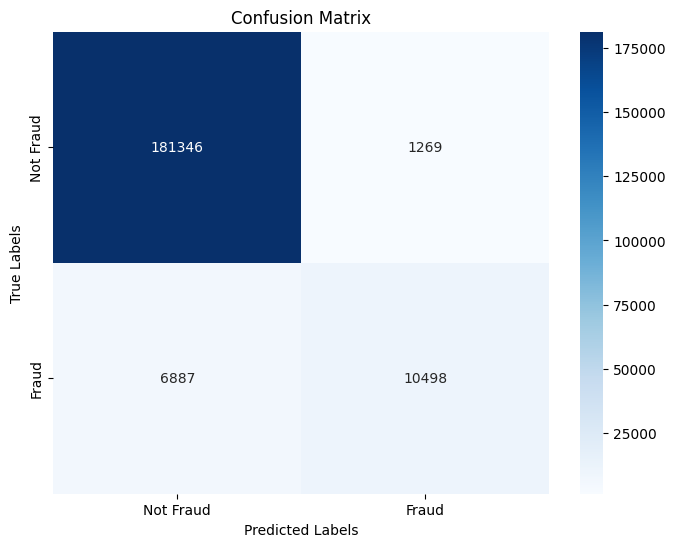

In [14]:
#3 Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [19]:
from sklearn.utils import resample
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
train["fraud"] = y_train.values
fraud_detected = train[train["fraud"] == 1]
fraud_not_detected = train[train["fraud"] == 0]
yes_fraud_oversampled = resample(fraud,
                                    replace=True,
                                    n_samples = len(fraud_not_detected),
                                    random_state=0)
train_over = pd.concat([yes_fraud_oversampled, fraud_not_detected])
train_over


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
985772,49.337507,0.525679,3.222327,1.000000,1.000000,0.000000,0.00000,0.0
305711,12.144343,0.040844,1.792877,1.000000,0.000000,0.000000,1.00000,0.0
435829,26.807084,4.409678,0.484273,1.000000,0.000000,1.000000,0.00000,0.0
117952,3.350111,12.997403,2.123634,1.000000,0.000000,0.000000,1.00000,0.0
963395,71.140002,3.107909,0.121555,1.000000,0.000000,0.000000,1.00000,0.0
...,...,...,...,...,...,...,...,...
799995,0.686916,-0.071705,-0.606513,0.366318,-0.734428,-0.334533,0.73251,0.0
799996,-0.359697,0.294316,0.106885,0.366318,-0.734428,-0.334533,0.73251,0.0
799997,0.002457,-0.023525,-0.477266,0.366318,-0.734428,2.989238,-1.36517,0.0
799998,-0.223923,-0.185220,-0.010973,0.366318,-0.734428,-0.334533,0.73251,0.0


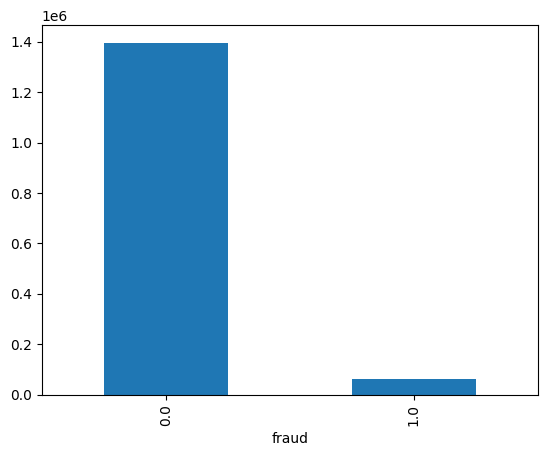

In [20]:
fraud_plt = train_over["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [22]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [23]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96    182615
         1.0       1.00      0.03      0.06     17385

    accuracy                           0.92    200000
   macro avg       0.96      0.52      0.51    200000
weighted avg       0.92      0.92      0.88    200000



In [24]:
train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,-0.357077,-0.150122,-0.423839,0.366318,1.361603,-0.334533,0.73251,0.0
1,0.194157,-0.185739,-0.433963,0.366318,1.361603,-0.334533,0.73251,0.0
2,0.443734,-0.150915,-0.484329,0.366318,-0.734428,-0.334533,0.73251,0.0
3,-0.402217,-0.166800,-0.460903,-2.729870,1.361603,-0.334533,-1.36517,0.0
4,-0.070140,-0.185709,-0.414141,0.366318,1.361603,-0.334533,-1.36517,0.0
...,...,...,...,...,...,...,...,...
799995,0.686916,-0.071705,-0.606513,0.366318,-0.734428,-0.334533,0.73251,0.0
799996,-0.359697,0.294316,0.106885,0.366318,-0.734428,-0.334533,0.73251,0.0
799997,0.002457,-0.023525,-0.477266,0.366318,-0.734428,2.989238,-1.36517,0.0
799998,-0.223923,-0.185220,-0.010973,0.366318,-0.734428,-0.334533,0.73251,0.0


In [27]:
no_fraud_undersampled = resample(fraud_not_detected,
                                    replace=False,
                                    n_samples = len(fraud_detected),
                                    random_state=0)
no_fraud_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
290678,0.264815,-0.177923,0.096183,0.366318,-0.734428,-0.334533,0.73251,0.0
199161,-0.238591,1.546072,-0.556717,0.366318,-0.734428,-0.334533,0.73251,0.0
238970,0.721159,0.005098,-0.547877,0.366318,-0.734428,2.989238,-1.36517,0.0
500779,-0.030997,-0.185533,-0.311518,0.366318,1.361603,-0.334533,0.73251,0.0
251427,-0.284021,-0.174000,-0.436299,0.366318,-0.734428,-0.334533,0.73251,0.0
...,...,...,...,...,...,...,...,...
534039,-0.320769,0.033076,-0.395331,0.366318,-0.734428,-0.334533,0.73251,0.0
342411,0.073559,-0.178794,-0.229242,0.366318,-0.734428,-0.334533,0.73251,0.0
400406,-0.144352,-0.185216,-0.469527,0.366318,-0.734428,-0.334533,-1.36517,0.0
526304,-0.388135,-0.174721,1.724969,-2.729870,1.361603,-0.334533,-1.36517,0.0


In [28]:
train_under = pd.concat([no_fraud_undersampled, fraud_detected])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
290678,0.264815,-0.177923,0.096183,0.366318,-0.734428,-0.334533,0.73251,0.0
199161,-0.238591,1.546072,-0.556717,0.366318,-0.734428,-0.334533,0.73251,0.0
238970,0.721159,0.005098,-0.547877,0.366318,-0.734428,2.989238,-1.36517,0.0
500779,-0.030997,-0.185533,-0.311518,0.366318,1.361603,-0.334533,0.73251,0.0
251427,-0.284021,-0.174000,-0.436299,0.366318,-0.734428,-0.334533,0.73251,0.0
...,...,...,...,...,...,...,...,...
799941,-0.342637,0.294419,5.726189,0.366318,1.361603,-0.334533,0.73251,1.0
799947,1.397456,-0.140950,-0.600287,0.366318,-0.734428,-0.334533,0.73251,1.0
799959,-0.301153,-0.180941,0.777658,0.366318,-0.734428,-0.334533,0.73251,1.0
799960,1.829827,-0.185883,-0.444220,0.366318,-0.734428,-0.334533,0.73251,1.0


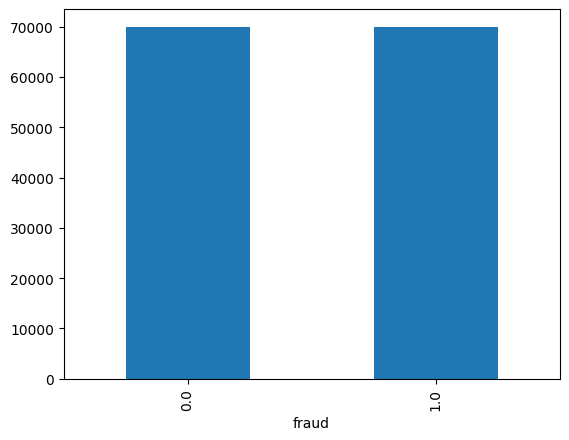

In [29]:
survived_plt = train_under["fraud"].value_counts()
survived_plt.plot(kind="bar")
plt.show()

In [30]:
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

In [31]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [32]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182615
         1.0       0.57      0.95      0.71     17385

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In [33]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 1,sampling_strategy=1.0)
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [34]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182615
         1.0       0.57      0.95      0.71     17385

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model?
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?